2
roses 0.819918692111969


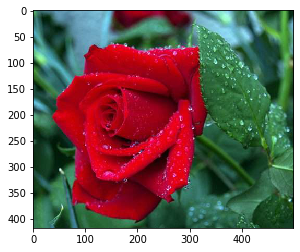

In [12]:
import torch
from model import AlexNet
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import json

data_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load image
img = Image.open("./rose.jpg")
plt.imshow(img)
# [N, C, H, W]
img = data_transform(img)  # 预处理的时候已经将channel这个维度提到最前面
# expand batch dimension
img = torch.unsqueeze(img, dim=0)  # 在最前面增加一个batch维度

# read class_indict
try:
    json_file = open('./class_indices.json', 'r')
    class_indict = json.load(json_file)
except Exception as e:
    print(e)
    exit(-1)

# create model
model = AlexNet(num_classes=5)
# load model weights
model_weight_path = "./AlexNet.pth"
model.load_state_dict(torch.load(model_weight_path))
model.eval()
with torch.no_grad():
    # predict class
    output = torch.squeeze(model(img))  # 将batch维度压缩掉
    predict = torch.softmax(output, dim=0)  # 变成概率分布
    predict_cla = torch.argmax(predict).numpy()  # 获得最大概率处的索引值
    # 第二种方法   
    print(torch.max(output,0)[1].numpy())
print(class_indict[str(predict_cla)], predict[predict_cla].item())
plt.show()
